<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [2]:
pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

In [3]:
pd.options.display.max_columns = 30
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#Общая информация по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
#Кол-во пропусков по столбцам
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#Общая статистика по столбцам с числовым типом данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
#Общая статистика по остальным столбцам
df.describe(include=['object', 'bool'])

,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


In [8]:
#Уникальные названия населенных пунктов
display(df['locality_name'].nunique())
df['locality_name'].unique()


364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [9]:
#Проверка наличия полных дубликатов
df.duplicated().sum()

0

### Вывод

Таблица данных содержит 22 столбца и более 23 тыс. строк. Предварительно можно утверждать, что, данных достаточно для проверки гипотез. В каждой строке таблицы содержится информация о конкретном объекте недвижимости.  
Названия столбцов в целом соответствуют "хорошему стилю", за исключением столбца `cityCenters_nearest`.  
Порядок столбцов хаотичен, некоторые близкие по смыслу признаки отстоят далеко друг от друга, что визуально затрудняет анализ.  
Пропуски содержатся в 14 столбцах, особенно многочисленны пропуски в столбцах `ceiling_height`, `is_apartment`, `balcony`, `parks_around3000`, `ponds_nearest`.  
Несоответсвие по типу данных имеются в следующих столбцах: `is_apartment` - тип object, согласно документации должен быть булев тип; `first_day_exposition` - тип object, содержит сведения о дате публикации; столбцы `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` имеют тип float, хотя по смыcлу содержат целочисленные данные, вероятно это связано с наличием NaN в этих столбцах.  
Из статистики по столбцам можно выявить следующие артефакты:
* Медианное (4,7 млн.р.) и среднее (6,5 млн.р.) значение цены недвижимости существенно отличаются, вероятно есть выбросы, существенно влияющие на среднюю цену. Подтверждением этому служит наличие недвижимости с ценой 763 млн.р. - максимальная цена в выборке.
* Максимальное значение столбца `ceiling_height` составляет 100 м, минимальное значение равно 1 м, вероятно столбец содержит ошибочные значения.  
* Минимальное значение столбца `rooms` равно нулю, что тоже не может быть корректным значением и требует обработки

Полных дублей в выборке нет.  
Столбец с названиями населенных пунктов содержит неявные дубли, к примеру: 'посёлок городского типа Павлово' и 'городской посёлок Павлово', к тому же имеется 'село Павлово', которое вероятнее всего не дубль, а другой населенный пункт. Другой пример дубликатов в названии поселков: 'посёлок Бугры' и 'поселок Бугры'. Наличие большого количества уникальных названий (364 шт) затрудняет визуальное выявление дублей.

## Предобработка данных

Переименуем название столбца 'cityCenters_nearest' в соответствии с хорошим стилем

In [10]:
df = df.rename(columns={'cityCenters_nearest':'city_сenters_nearest'})

Организуем порядок столбцов таблицы таким образом, чтобы признаки, характеризующие близкие по смыслу свойства находились рядом,основной признак 'last_price' сделаем первым столбцом

In [11]:
df = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'balcony', 'is_apartment', 'studio', 'open_plan',
        'ceiling_height', 'floors_total', 'floor', 'total_images', 'first_day_exposition', 'days_exposition','locality_name',
        'airports_nearest','city_сenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']]

In [12]:
df.head()

,last_price,total_area,living_area,kitchen_area,rooms,balcony,is_apartment,studio,open_plan,ceiling_height,floors_total,floor,total_images,first_day_exposition,days_exposition,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,13000000.0,108.0,51.0,25.0,3,NaN,NaN,False,False,2.70,16.0,8,20,2019-03-07T00:00:00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,3350000.0,40.4,18.6,11.0,1,2.0,NaN,False,False,NaN,11.0,1,7,2018-12-04T00:00:00,81.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,5196000.0,56.0,34.3,8.3,2,0.0,NaN,False,False,NaN,5.0,4,10,2015-08-20T00:00:00,558.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,64900000.0,159.0,NaN,NaN,3,0.0,NaN,False,False,NaN,14.0,9,0,2015-07-24T00:00:00,424.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,10000000.0,100.0,32.0,41.0,2,NaN,NaN,False,False,3.03,14.0,13,2,2018-06-19T00:00:00,121.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0


Обработаем пропуски и нетипичные значения, выявленные на этапе изучения данных.

Столбец `ceiling_height` имеет максимальное значение 100 м, что вероятнее всего является ошибкой. Посмотрим на распределение высоты потолков во всем датафрейме

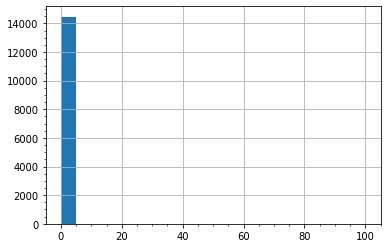

In [13]:
df['ceiling_height'].hist(range=(0,100),bins=20)
plt.minorticks_on()

В основном потолки имеют высоту до 5м, что вполне предсказуемо. Для определения выбивающихся значений и их количества построим гистрограмму по потолкам с высотой более 5 м.

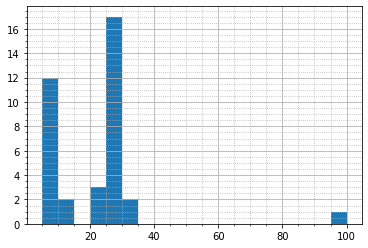

In [14]:
df['ceiling_height'].hist(range=(5,100), bins=19)
plt.minorticks_on()
plt.grid(which='minor',
        linestyle = ':')

Также посмотрим на потолки с высотой менее 2 м.

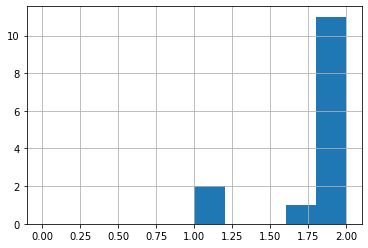

In [15]:
df['ceiling_height'].hist(range=(0,2), bins=10);


100 метровый потолок - единичный случай.  
Имеются объекты недвижимости с высотой от 5 до 10 м - 12 шт, существование такой недвижимости можно допустить. Однако потолки с высотой более 10 м уже вызывают сомнение:
в диапазоне от 10 до 15 м - 2 объекта, от 20 до 25 - 3 шт, от 25 до 30 м - целых 17 шт и от 30 до 35 м - 2 шт.
Большое кол-во объектов в диапазоне от 25 до 30 м позволяет предположить, что вероятнее всего - это объекты с типичной высотой потолка от 2,5 до 3 м, по которым возникла ошибка с разделителем целой и дробной части. По прилегающим диапазонам от 20 до 25 м и от 30 до 35 м вероятно возникла такая же ошибка. Следовательно, для получени корректных значений нужно поделить на 10.  
Также имеется 3 квартиры с высотой потолков менее 1,8 м, существование таких квартир вызывает сомнение.
Для 3-х объектов с высотой потолков до 1.8 м, 2-х объектов с потолками в диапазоне от 10 до 15 м и одного объекта с высотой 100 м заменим значения на NaN. Пропуски оставим, т.к. замена такого большого количества пропусов на какую либо статистику может негативно сказаться на качестве модели.

In [16]:
df.loc[df['ceiling_height'] == 100, 'ceiling_height'] = np.nan
df.loc[(df['ceiling_height'] >= 10) & (df['ceiling_height'] <= 15), 'ceiling_height'] = np.nan
df.loc[df['ceiling_height'] <= 1.8 , 'ceiling_height'] = np.nan
df.loc[(df['ceiling_height'] >= 20) & (df['ceiling_height'] <= 35), 'ceiling_height'] = df['ceiling_height']/10

In [17]:
df[df['ceiling_height'] >= 10]['ceiling_height'].count()

0

Имеется 1903 пропуска по столбцу `living_area` и 2278 по `kitchen_area`, по столбцу `total_area` пропусков нет. Можно предположить, что при известных значениях общей и жилой площади можно примерно рассчитать площадь кухни, а при известных значениях общей площади и кухни прикинуть жилую площадь. Но нам неизвестна оставшаяся нежилая площадь (т.е. за исключением кухни).

Рассчитаем параметр 'other_area', как разницу между общей площадью и суммой жилой площади и кухни, и посмотрим на срез данных, который не содержит пропусков по значениям жилой площади и кухни

In [18]:
df['other_area'] = df['total_area'] - df['living_area'] - df['kitchen_area']
df_area = df.loc[(df['living_area'].notna()) & (df['kitchen_area'].notna()),
                 ['total_area', 'living_area', 'kitchen_area', 'other_area']]

In [19]:
df_area.describe()

,total_area,living_area,kitchen_area,other_area
count,20982.000000,20982.000000,20982.000000,20982.000000
mean,60.547304,34.644380,10.516987,15.385936
std,34.497775,21.916891,5.843371,12.171863
min,14.000000,2.000000,1.300000,-29.800000
25%,40.500000,18.800000,7.000000,9.402500
50%,52.205000,30.100000,9.000000,12.700000
75%,70.000000,42.547500,12.000000,17.800000
max,900.000000,409.700000,112.000000,378.300000


Оказалось, что `other_area` содержит отрицательные значения, т.е. в некоторых случаях сумма жиой площади и кухни превышает общую площадь.

In [20]:
df_area.query('other_area < 0')

,total_area,living_area,kitchen_area,other_area
184,30.20,26.10,6.20,-2.100000e+00
545,23.80,20.00,5.00,-1.200000e+00
551,31.59,30.55,9.28,-8.240000e+00
601,53.70,48.30,7.00,-1.600000e+00
696,34.69,23.43,23.43,-1.217000e+01
...,...,...,...,...
21868,34.30,30.60,8.00,-4.300000e+00
21915,91.40,62.00,32.40,-3.000000e+00
21956,46.00,44.00,8.00,-6.000000e+00
22399,54.80,39.50,15.30,-3.552714e-15


Таких ошибок 67 шт. В основном ошибка составляет несколько кв.м, но встречаются и ошибки, связанные с тем, что площадь кухни точно приравнена жилой площади (объект с индексом 696).

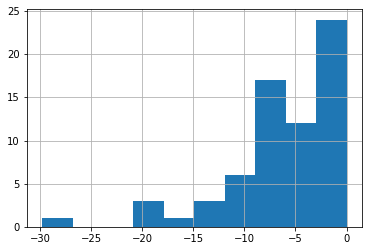

In [21]:
df_area.query('other_area < 0').other_area.hist();

 Для исправления этой ситуации, в случае отрицательного значения `other_area` приравняем площадь кухни разности общей и жилой площади

In [22]:
df.loc[df['other_area'] < 0, 'kitchen_area'] = (df['total_area'] - df['living_area'])


In [23]:
df['other_area'] = df['total_area'] - df['living_area'] - df['kitchen_area']
df_area = df.loc[(df['living_area'].notna()) & (df['kitchen_area'].notna() & (df['other_area'] > 0)),
                 ['total_area', 'living_area', 'kitchen_area', 'other_area']]
df_area.describe()

,total_area,living_area,kitchen_area,other_area
count,20853.000000,20853.000000,20853.000000,2.085300e+04
mean,60.602555,34.606017,10.495882,1.550066e+01
std,34.549107,21.928932,5.820065,1.211496e+01
min,14.000000,2.000000,1.300000,1.776357e-15
25%,40.500000,18.800000,7.000000,9.500000e+00
50%,52.300000,30.000000,9.000000,1.270000e+01
75%,70.000000,42.500000,12.000000,1.790000e+01
max,900.000000,409.700000,112.000000,3.783000e+02


Обращает на себя внимание наличие квартир с жилой площадью 2 кв.м, что возможно также является ошибкой.
Рассмотрим квартиры с жилой площадью менее 5 кв.м

In [24]:
df[df['living_area'] < 5]

,last_price,total_area,living_area,kitchen_area,rooms,balcony,is_apartment,studio,open_plan,ceiling_height,floors_total,floor,total_images,first_day_exposition,days_exposition,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,other_area
3242,4440000.0,41.0,3.0,11.0,1,NaN,NaN,False,False,NaN,17.0,17,7,2017-07-02T00:00:00,216.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,27.0
13915,6350000.0,52.0,2.0,9.0,2,NaN,NaN,False,False,3.0,6.0,2,20,2018-02-06T00:00:00,91.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,41.0
21758,2330000.0,23.0,2.0,NaN,0,NaN,NaN,True,False,NaN,24.0,22,0,2018-01-01T00:00:00,66.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23574,64990000.0,139.0,3.0,16.0,3,1.0,NaN,False,False,3.0,8.0,8,14,2015-11-24T00:00:00,280.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,120.0


Оказалось таких квартир всего 4 штуки, общая площадь по ним составляет от 23 до 139 кв.м, т.ч. высока вероятность, что столбец  `living_area` по этим объектам заполнен некорректно. Удалим эти строки

In [25]:
df = df.drop(df[df['living_area'] < 5].index)
df[df['living_area'] < 5]['living_area'].count()

0

Рассмотри взаимосвязь общей, жилой площади, площади кухни и остатка (нежилой площади за исключением кухни)

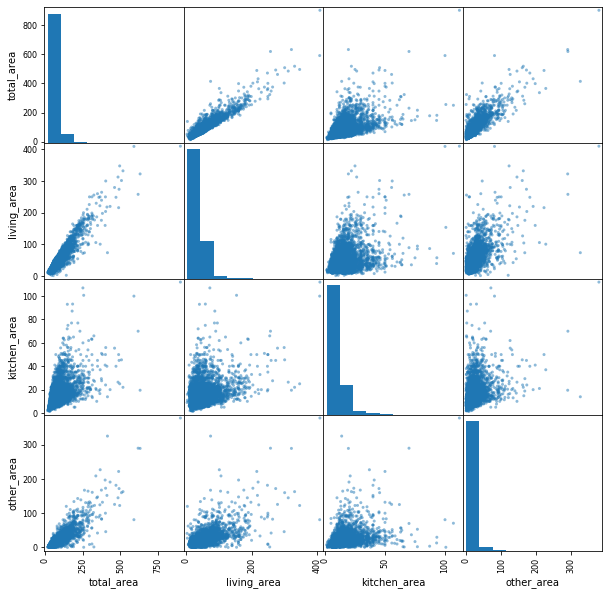

In [26]:
pd.plotting.scatter_matrix(df_area, figsize=(10,10));

In [27]:
df_area.corr()

,total_area,living_area,kitchen_area,other_area
total_area,1.000000,0.940433,0.611790,0.855617
living_area,0.940433,1.000000,0.428615,0.665923
kitchen_area,0.611790,0.428615,1.000000,0.488460
other_area,0.855617,0.665923,0.488460,1.000000


Жилая площадь имеет очень высокий коэффициент корреляции с общей площадью. Это позволит с приемлимиой точностью расситать жилую площадь на основе общей в случае пропуска.  
`other_area` тоже достаточно сильно коррелирует с `total_area` (коэффициент корреляции 0,85), что тоже теоретически позволяет посчитать данный параметр на основе общей площади, а площадь кухни затем определить путем вычитания из общей площади суммы жилой площади и "прочей" площади. Однако данные преобразования не слишком очевидны и могут исказить данные, поэтому ограничимся расчетом жилой площади на основе общей, там где это возможно.

In [28]:
total_living = df_area['total_area'] / df_area['living_area']
total_living.describe()

count    20853.000000
mean         1.855444
std          0.547646
min          1.100789
25%          1.576596
50%          1.768362
75%          2.030303
max         46.333333
dtype: float64

Можно использовать коэффициент 1,77 (медиану, для уменьшения влияния выбросов) для расчета жилой площади на основе общей.

In [29]:
df['living_area'] = df['living_area'].fillna((df['total_area']/1.77).round(1))
df['living_area'].isna().sum()

0

In [30]:
#Проверим на наличие возможных ошибок, появившихся в ходе преобразований,
# когда площадь кухни превышает разность общей и жилой площади
(df['total_area'] - df['living_area'] < df['kitchen_area']).sum()

8

In [31]:
#Исправим данные ошибки
df.loc[(df['total_area'] - df['living_area'] < df['kitchen_area']),'living_area'] = df['total_area'] - df['kitchen_area']

In [32]:
#Удалим вспомогательный столбец 'other_area'
df.drop('other_area', axis=1, inplace=True)

Рассмотрим стобец с количеством балконов, в задании к проекту есть предположение, что отсутствующие значения в стобце с количеством балконов это пропущенные нули.

In [33]:
df.balcony.isna().sum()

11516

In [34]:
df.balcony.value_counts()

1.0    4194
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

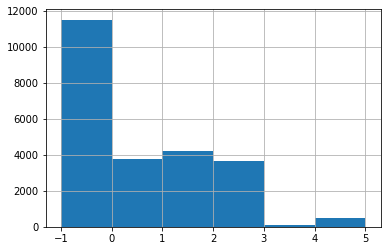

In [35]:
#Для возможности построения гистограммы, заменим временно пропуски на "-1"
df.balcony = df.balcony.fillna(-1)
df.balcony.astype(int)
df['balcony'].hist(bins=6);

Количество квартир без балконов, с одним и с двумя балконами примерно одинаково и составляет порядка 4000, однако пропусков гораздо больше, чем любая из этих категорий.  
Логично предположить, что отсутствие балконов более характерно для первого этажа. Проверим это на выборке без пропусков

In [36]:
df[df['balcony'] >= 0].pivot_table(index='floor', columns='balcony', values='last_price', aggfunc='count').head(10)

balcony,0.0,1.0,2.0,3.0,4.0,5.0
floor,,,,,,
1,604.0,131.0,232.0,2.0,7.0,15.0
2,597.0,605.0,325.0,7.0,18.0,37.0
3,500.0,626.0,365.0,6.0,28.0,32.0
4,444.0,594.0,352.0,16.0,26.0,16.0
5,411.0,569.0,342.0,11.0,21.0,29.0
6,172.0,236.0,268.0,7.0,10.0,19.0
7,188.0,242.0,241.0,7.0,9.0,23.0
8,132.0,215.0,222.0,6.0,15.0,21.0
9,165.0,213.0,236.0,3.0,7.0,15.0


Действительно для квартир на первом этаже отсутствие балконов характерно примерно для 2/3 случаев, а начиная со второго этажа квартиры с балконами превышают количество квартир без балконов.

Посмотрим как изменится распределение если пропущенные значения рассматривать как отсутствие балкона

In [37]:
df.pivot_table(index='floor', columns='balcony', values='last_price', aggfunc='count').head(10)

balcony,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
floor,,,,,,,
1,1926.0,604.0,131.0,232.0,2.0,7.0,15.0
2,1778.0,597.0,605.0,325.0,7.0,18.0,37.0
3,1516.0,500.0,626.0,365.0,6.0,28.0,32.0
4,1356.0,444.0,594.0,352.0,16.0,26.0,16.0
5,1238.0,411.0,569.0,342.0,11.0,21.0,29.0
6,593.0,172.0,236.0,268.0,7.0,10.0,19.0
7,508.0,188.0,242.0,241.0,7.0,9.0,23.0
8,471.0,132.0,215.0,222.0,6.0,15.0,21.0
9,412.0,165.0,213.0,236.0,3.0,7.0,15.0


In [38]:
#Процент квартир без балкона от общего количества квартир, сгруппированные по этажу
df.pivot_table(index='floor', columns='balcony', values='last_price', aggfunc='count').apply(lambda x:
                                                                    (x[-1]+x[0]) / sum(x) * 100, axis=1).head(10)

floor
1     86.732945
2     70.537571
3     65.603645
4     64.194009
5     62.914918
6     58.620690
7     57.142857
8     55.730129
9     54.900095
10    53.275109
dtype: float64

Вероятнее всего пропуски в столбцах с балконами - это не нули, а действительно случайно пропущенные значения, в противном случае квартиры без балконов будут преобладать в выборке независимо от этажа, в котором эти квартиры распололжены.  
Будет логично, если для квартир на первом этаже заменить пропуски в столбце с балконами на нули, а для других этажей оставим пропуски без изменения.

In [39]:
df.loc[(df['balcony'] == -1) & (df['floor'] == 1), 'balcony'] = 0
df.loc[(df['balcony'] == -1) & (df['floor'] > 1), 'balcony'] = np.nan

Рассмотрим столбец `rooms`, который содержит нулевые значения

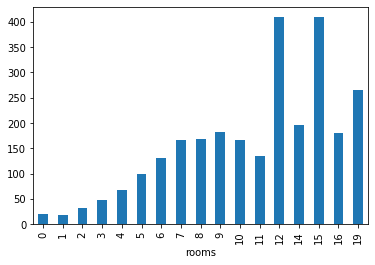

In [40]:
df.groupby('rooms')['living_area'].mean().plot(kind='bar', x='rooms', y='living_area');

Судя по диаграмме связь количества комнат и площади достаточно прочная, по крайней мере в диапазоне до 10 комнат. Вероятнее всего квартиры "без комнат" соответствуют квартирам с одной комнатой. Произведем соответствующую замену.

In [41]:
df.loc[df['rooms'] == 0, 'rooms'] = 1

In [42]:
#Кол-во пропусков в столбце 'is_apartment'
df.is_apartment.isna().sum()

20920

In [43]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Количество аппартаментов занимает небольшую долю от общего количества квартир, поэтому логично предположить, что пропуски - это обычные квартиры. Заменим NaN на False и преобразуем тип признака на булев.

In [44]:
df.is_apartment = df.is_apartment.fillna(False)
df.is_apartment = df.is_apartment.astype(bool)

Преобразуем тип столбца с датой публикации на "datetime" и происследуем пропуски в столбце `days_exposition` в привязке с днем публикации. Возможно пропуски связаны с тем, что объявление еще не снято с публикации на момент выгрузки данных.

In [45]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [46]:
df['first_day_exposition'].describe()

count                   23695
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

In [47]:
df['days_exposition'].isna().sum()

3181

In [48]:
df.days_exposition = df.days_exposition.fillna(-1)

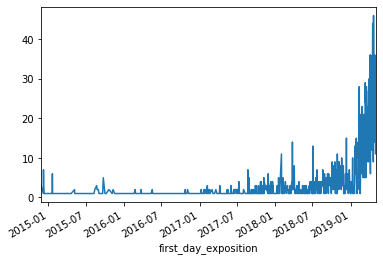

In [49]:
df[df['days_exposition'] == -1].groupby('first_day_exposition')['days_exposition'].count().plot(
                                                                                        kind='line', 
                                                                                        x='first_day_exposition', 
                                                                                        y='day_expositions');

Очевидно, что число пропусков по столбцу `days_exposition` связано с датой публикации, и последние объявления просто не сняты с публикации, а значения по ним заполнены пропусками. Оставим пропуски как есть, чтобы не исказить нашу выборку.

In [50]:
df.loc[df['days_exposition'] == -1, 'days_exposition'] = np.nan

Рассмотрим столбцы с картографическими данными. Было отмечено, что в названиях населенных пунктов встречаются неявные дубли

In [51]:
df['locality_name'].isna().sum()

49

Т.к. количество пропущенных значений по столбцу `locality_name` незначительно по сравнению с объемом датафрейма и вероятно принадлежность объекта к тому или иному населенному пункту окажет существенное влияние на параметр цены, удалим строки таблицы с пропусками.

In [52]:
df.dropna(subset=['locality_name'], inplace=True)

In [53]:
df['locality_name'].nunique()

364

Создадим дополнительные столбцы с типом населенного пункта и его названием

In [54]:
def type_and_name(locality):
    type_locality = []
    name_locality = []
    words = str(locality).split(' ')
    for word in words:
        if not word.istitle():
            type_locality.append(word)
        if word.istitle():
            name_locality.append(word)
    type_loc = ' '.join(type_locality)
    name_loc = ' '.join(name_locality)
    return pd.Series([type_loc, name_loc])

In [55]:
df[['type_locality','name_locality']] = df['locality_name'].apply(type_and_name)
df[['locality_name', 'type_locality','name_locality']]

,locality_name,type_locality,name_locality
0,Санкт-Петербург,,Санкт-Петербург
1,посёлок Шушары,посёлок,Шушары
2,Санкт-Петербург,,Санкт-Петербург
3,Санкт-Петербург,,Санкт-Петербург
4,Санкт-Петербург,,Санкт-Петербург
...,...,...,...
23694,Санкт-Петербург,,Санкт-Петербург
23695,Тосно,,Тосно
23696,село Рождествено,село,Рождествено
23697,Санкт-Петербург,,Санкт-Петербург


In [56]:
df.groupby('name_locality')['type_locality'].nunique().sort_values(ascending=False)

name_locality
Рябово        3
Мурино        3
Рощино        3
Павлово       3
Свердлова     2
             ..
Подпорожье    1
Плоское       1
Плодовое      1
Платформа     1
Агалатово     1
Name: type_locality, Length: 305, dtype: int64

Некоторые названия встречаются в трех вариациях. Посмотрим на уникальные названия типов населенных пунктов

In [57]:
set(df['type_locality'])

{'',
 'городской поселок',
 'городской посёлок',
 'деревня',
 'коттеджный поселок',
 'коттеджный посёлок',
 'поселок',
 'поселок городского типа',
 'поселок городского типа имени',
 'поселок станции',
 'посёлок',
 'посёлок 69-й километр',
 'посёлок городского типа',
 'посёлок городского типа имени',
 'посёлок при железнодорожной станции',
 'посёлок станции',
 'садоводческое некоммерческое товарищество',
 'садовое товарищество',
 'село'}

Во всех названиях заменим `посёлок` на `поселок`, а также `городской поселок` на `поселок городского типа`

In [58]:
df['type_locality'] = df['type_locality'].apply(lambda x: x.replace('посёлок', 'поселок'))
df['type_locality'] = df['type_locality'].apply(lambda x: x.replace('городской поселок', 'поселок городского типа'))

In [59]:
set(df['type_locality'])

{'',
 'деревня',
 'коттеджный поселок',
 'поселок',
 'поселок 69-й километр',
 'поселок городского типа',
 'поселок городского типа имени',
 'поселок при железнодорожной станции',
 'поселок станции',
 'садоводческое некоммерческое товарищество',
 'садовое товарищество',
 'село'}

Рассмотри оставшиеся населенные пункты, содержащие несколько типов названий. Произведем точечные замены, исходя из соображений, что принципиально разные типы (например деревня и поселок) - это не дубли, а действительно разные населенные пункты; а схожие (например поселок и коттеджный поселок) - это дубли. В случае наличия названия без типа и с типом также произведем замену.

In [60]:
df.groupby('name_locality')['type_locality'].unique()[df.groupby('name_locality')['type_locality'].nunique() > 1]

name_locality
Вещево           [поселок станции, поселок при железнодорожной ...
Гарболово                                       [деревня, поселок]
Громово                                 [поселок станции, поселок]
Зимитицы                                        [поселок, деревня]
Калитино                                        [деревня, поселок]
Кудрово                                                [деревня, ]
Лесное                               [поселок, коттеджный поселок]
Любань                                                 [, поселок]
Мурино                                                 [поселок, ]
Никольское                                                [, село]
Павлово                            [село, поселок городского типа]
Приветнинское    [поселок станции, поселок при железнодорожной ...
Приладожский       [поселок городского типа, садовое товарищество]
Рабитицы                                        [деревня, поселок]
Рахья              [поселок городского типа, сад

In [61]:
df.loc[df['name_locality'] == 'Вещево', 'type_locality'] = 'поселок станции'
df.loc[df['name_locality'] == 'Громово', 'type_locality'] = 'поселок'
df.loc[df['name_locality'] == 'Кудрово', 'type_locality'] = 'деревня'
df.loc[df['name_locality'] == 'Лесное', 'type_locality'] = 'поселок'
df.loc[df['name_locality'] == 'Любань', 'type_locality'] = 'поселок'
df.loc[df['name_locality'] == 'Мурино', 'type_locality'] = 'поселок'
df.loc[df['name_locality'] == 'Никольское', 'type_locality'] = 'село'
df.loc[df['name_locality'] == 'Приветнинское', 'type_locality'] = 'поселок станции'
df.loc[df['name_locality'] == 'Рябово', 'type_locality'] = 'поселок'
df.groupby('name_locality')['type_locality'].unique()[df.groupby('name_locality')['type_locality'].nunique() > 1]

name_locality
Гарболово                                    [деревня, поселок]
Зимитицы                                     [поселок, деревня]
Калитино                                     [деревня, поселок]
Павлово                         [село, поселок городского типа]
Приладожский    [поселок городского типа, садовое товарищество]
Рабитицы                                     [деревня, поселок]
Рахья           [поселок городского типа, садовое товарищество]
Фёдоровское                  [деревня, поселок городского типа]
Щеглово                                      [поселок, деревня]
Name: type_locality, dtype: object

Пересоздадим столбец `locality_name` и удалим вспомогательные  столбцы `type_locality` и `name_locality`

In [63]:
df['locality_name'] = (df.apply(lambda x: x['type_locality'] + ' ' 
                                + x['name_locality'] if x['type_locality'] != '' else x['name_locality'], axis=1))

In [64]:
df[['locality_name', 'type_locality','name_locality']]

,locality_name,type_locality,name_locality
0,Санкт-Петербург,,Санкт-Петербург
1,поселок Шушары,поселок,Шушары
2,Санкт-Петербург,,Санкт-Петербург
3,Санкт-Петербург,,Санкт-Петербург
4,Санкт-Петербург,,Санкт-Петербург
...,...,...,...
23694,Санкт-Петербург,,Санкт-Петербург
23695,Тосно,,Тосно
23696,село Рождествено,село,Рождествено
23697,Санкт-Петербург,,Санкт-Петербург


In [65]:
df.drop(['type_locality', 'name_locality'], axis=1, inplace=True)

Рассмотрим пропуски по столбцу `city_сenters_nearest`

In [66]:
df.city_сenters_nearest = df.city_сenters_nearest.fillna(-1)

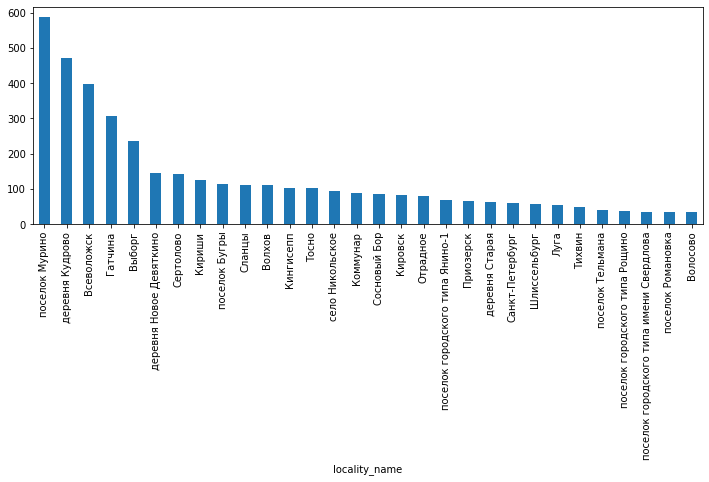

In [67]:
(df[df['city_сenters_nearest'] == -1].groupby(['locality_name'])['city_сenters_nearest'].
                                    count().sort_values(ascending=False)[:30].
                                    plot(kind='bar', figsize=(12,4)));

In [68]:
df1 = df[df['city_сenters_nearest'] == -1].groupby(['locality_name'])['city_сenters_nearest'].count().reset_index()
df2 = df[df['city_сenters_nearest'] != -1].groupby(['locality_name'])['city_сenters_nearest'].count().reset_index()
df1.merge(df2, how='inner', on='locality_name')

,locality_name,city_сenters_nearest_x,city_сenters_nearest_y
0,Колпино,1,337
1,Красное Село,2,176
2,Кронштадт,1,95
3,Ломоносов,1,132
4,Пушкин,1,368
5,Санкт-Петербург,61,15657
6,поселок Мурино,587,2
7,поселок Шушары,4,436
8,поселок Щеглово,22,1


Есть 9 населенных пункта, по которым есть объявления с пропусками и без пропусков в столбце `city_сenters_nearest`. Можно попробовать заполнить пропуски, основываясь на среднем значении для кажого населенного пункта, однако это будет очень грубо и может повлиять на качество прогностической модели, к тому же таким образом можно будет заполнить лишь небольшую часть от имеющихся пропусков. В данном случае, вероятно лучше попытаться восстановить данные, повторно обратившись к базе данных и выяснив причину пропусков, либо провести дополнительные расчеты на основе координат объектов, если они имеются.  
Количество пропусков в столбцах `airports_nearest`, `city_сenters_nearest`, `parks_around3000`,  `ponds_around3000` примерно одинаково. Вероятно, это связанные пропуски, возникшие вследствие ошибки в автоматически формируемых картографических данных.

In [69]:
df.loc[df['city_сenters_nearest'] == -1, 'city_сenters_nearest'] = np.nan

In [70]:
(df['airports_nearest'].isna() == df['city_сenters_nearest'].isna()).value_counts()

True     23621
False       25
dtype: int64

In [71]:
(df['city_сenters_nearest'].isna() == df['ponds_around3000'].isna()).value_counts()

True     23645
False        1
dtype: int64

In [72]:
(df['parks_around3000'].isna() == df['ponds_around3000'].isna()).value_counts()

True    23646
dtype: int64

Действительно, пропуски в основном совпадают, а для столбцов `parks_around3000` и `ponds_around3000` совпадение полное

Столбцец `parks_nearest` содержит пропуски примерно в 2/3 случаях. Вероятно, присутствуют два типа пропусков - отсутствие парков (в этом случае столбец `parks_around3000` должен иметь нулевое значение) и пропуски связанные с отсутсвием данных. Заполним пропуски первого типа большим числом (с учетом того что парки оцениваются в радиусе 3000 м, подойдет к примеру 9999), это позволит отличить отсутсвие значение от отсутствия парка в заданном радиусе. Аналогичные рассуждения применимы и для столбца `ponds_nearest`

In [73]:
df[(df['parks_nearest'].isna()) & (df['parks_around3000'] == 0)]['parks_around3000'].count()

10074

In [74]:
df[(df['ponds_nearest'].isna()) & (df['ponds_around3000'] == 0)]['parks_around3000'].count()

9054

In [75]:
df.loc[(df['parks_nearest'].isna()) & (df['parks_around3000'] == 0), 'parks_nearest'] = 9999
df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around3000'] == 0), 'ponds_nearest'] = 9999

In [76]:
df.isna().sum()

last_price                 0
total_area                 0
living_area                0
kitchen_area            2268
rooms                      0
balcony                 9584
is_apartment               0
studio                     0
open_plan                  0
ceiling_height          9164
floors_total              85
floor                      0
total_images               0
first_day_exposition       0
days_exposition         3180
locality_name              0
airports_nearest        5533
city_сenters_nearest    5510
parks_around3000        5509
parks_nearest           5509
ponds_around3000        5509
ponds_nearest           5509
dtype: int64

### Вывод

Были проанализированы и по-возможности устранены пропуски и нетипичные значения ряда параметров, содержащихся в исходном датафрейме:
* На основе анализа корреляции,  были заполнены пропуски столбца `living_area` на основе данных столбца `total_area`. Обнаружены и устранены ошибочные значения площадей, заключающиеся в том, что сумма  жилой площади и площади кухни в некоторых случаях превышала общую площадь.  
* Обнаружены выбросы в столбце `ceiling_height`, сделано предположение относительно наиболее вероятной причины их возникли, произведена их обработка и приведение значений к типичным значениям.  
* Заполнена часть пропусков в столбце `balcony`, отвергнута возможность замены пропусков данного столбца нулевыми значениями, предложенная в задании к проекту.  
* Выявлено, что пропуски в столбце `days_exposition` связаны с не снятыми на момент выгрузки публикациями.
* Обработаны неявные дубли в столбце `locality_name`, названия населенных пунктов приведены к единому типу.
* Выявлено, что основная масса пропусков по картографичиским параметрам относятся к одним и тем же строкам таблицы. Рациональная замена большей части этих пропусков на основе имеющихся данных невозможна. Т.к. количество таких строк составляет существенную часть выборки (около 25%) необходимо попытаться восстановить пропущенные значения путем выяснения и устранения причин пропусков.
* Заменены пропуски по столбцам `parks_nearest` и `ponds_nearest`, связанные с отсутствием соответственно парков и водоемомов в радиусе 3000 м на большое число, существенно превышающее заданный радиус. Данная замена позволит отделить пропущенные значения из-за отсутствия данных от пропусков из-за отсутствия соответствующих объектов рядом с рассматриваемыми квартирами.  

Типы данных изменены в столбце `is_apartment` на булев тип после заполнения пропусков наиболее вероятным значением и столбца `first_day_exposition` на datetime.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу цену квадратного метра

In [77]:
df['price_square_metr'] = (df['last_price'] / df['total_area']).round(1)

Добавим в таблицу день недели, месяц и год публикации объявления

In [78]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday_name
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Добавим в таблицу этаж квартиры: первый, последний, другой, предварительно составив соответствующую функцию

In [79]:
def floor_of_flat(floor, floors_total):
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    else:
        return 'other'

In [80]:
df['floor_of_flat'] = df.apply(lambda x: floor_of_flat(x.floor, x.floors_total), axis=1)

Добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [81]:
df['living_to_total'] = (df['living_area'] / df['total_area']).round(1)
df['kitchen_to_total'] = (df['kitchen_area'] / df['total_area']).round(1)


In [82]:
df

,last_price,total_area,living_area,kitchen_area,rooms,balcony,is_apartment,studio,open_plan,ceiling_height,floors_total,floor,total_images,first_day_exposition,days_exposition,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_square_metr,weekday_exposition,month_exposition,year_exposition,floor_of_flat,living_to_total,kitchen_to_total
0,13000000.0,108.00,51.0,25.00,3,NaN,False,False,False,2.70,16.0,8,20,2019-03-07,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,120370.4,Thursday,3,2019,other,0.5,0.2
1,3350000.0,40.40,18.6,11.00,1,2.0,False,False,False,NaN,11.0,1,7,2018-12-04,81.0,поселок Шушары,12817.0,18603.0,0.0,9999.0,0.0,9999.0,82920.8,Tuesday,12,2018,first,0.5,0.3
2,5196000.0,56.00,34.3,8.30,2,0.0,False,False,False,NaN,5.0,4,10,2015-08-20,558.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,92785.7,Thursday,8,2015,other,0.6,0.1
3,64900000.0,159.00,89.8,NaN,3,0.0,False,False,False,NaN,14.0,9,0,2015-07-24,424.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,408176.1,Friday,7,2015,other,0.6,NaN
4,10000000.0,100.00,32.0,41.00,2,NaN,False,False,False,3.03,14.0,13,2,2018-06-19,121.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,100000.0,Tuesday,6,2018,other,0.3,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,73.3,13.83,3,NaN,False,False,False,3.70,5.0,3,9,2017-03-21,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,72490.8,Tuesday,3,2017,other,0.5,0.1
23695,3100000.0,59.00,38.0,8.50,3,NaN,False,False,False,NaN,5.0,4,14,2018-01-15,45.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,52542.4,Monday,1,2018,other,0.6,0.1
23696,2500000.0,56.70,29.7,NaN,2,0.0,False,False,False,NaN,3.0,1,18,2018-02-11,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,44091.7,Sunday,2,2018,first,0.5,NaN
23697,11475000.0,76.75,43.4,23.30,2,2.0,False,False,False,3.00,17.0,12,13,2017-03-28,602.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,149511.4,Tuesday,3,2017,other,0.6,0.3


Для удобства восприятия таблицы организуем порядок новых столбцов столбцов таким образом, чтобы новые признаки следовали непосредственно после тех столбцов, на основе которых были рассчитаны.

In [83]:
df.insert(df.columns.get_loc('last_price')+1,'price_square_metr',df.pop('price_square_metr'))
df.insert(df.columns.get_loc('first_day_exposition')+1,'weekday_exposition',df.pop('weekday_exposition'))
df.insert(df.columns.get_loc('weekday_exposition')+1,'month_exposition',df.pop('month_exposition'))
df.insert(df.columns.get_loc('month_exposition')+1,'year_exposition',df.pop('year_exposition'))
df.insert(df.columns.get_loc('floor')+1,'floor_of_flat',df.pop('floor_of_flat'))
df.insert(df.columns.get_loc('living_area')+1,'living_to_total',df.pop('living_to_total'))
df.insert(df.columns.get_loc('kitchen_area')+1,'kitchen_to_total',df.pop('kitchen_to_total'))

In [84]:
df

,last_price,price_square_metr,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,rooms,balcony,is_apartment,studio,open_plan,ceiling_height,floors_total,floor,floor_of_flat,total_images,first_day_exposition,weekday_exposition,month_exposition,year_exposition,days_exposition,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,13000000.0,120370.4,108.00,51.0,0.5,25.00,0.2,3,NaN,False,False,False,2.70,16.0,8,other,20,2019-03-07,Thursday,3,2019,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,3350000.0,82920.8,40.40,18.6,0.5,11.00,0.3,1,2.0,False,False,False,NaN,11.0,1,first,7,2018-12-04,Tuesday,12,2018,81.0,поселок Шушары,12817.0,18603.0,0.0,9999.0,0.0,9999.0
2,5196000.0,92785.7,56.00,34.3,0.6,8.30,0.1,2,0.0,False,False,False,NaN,5.0,4,other,10,2015-08-20,Thursday,8,2015,558.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,64900000.0,408176.1,159.00,89.8,0.6,NaN,NaN,3,0.0,False,False,False,NaN,14.0,9,other,0,2015-07-24,Friday,7,2015,424.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,10000000.0,100000.0,100.00,32.0,0.3,41.00,0.4,2,NaN,False,False,False,3.03,14.0,13,other,2,2018-06-19,Tuesday,6,2018,121.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,72490.8,133.81,73.3,0.5,13.83,0.1,3,NaN,False,False,False,3.70,5.0,3,other,9,2017-03-21,Tuesday,3,2017,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,3100000.0,52542.4,59.00,38.0,0.6,8.50,0.1,3,NaN,False,False,False,NaN,5.0,4,other,14,2018-01-15,Monday,1,2018,45.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN
23696,2500000.0,44091.7,56.70,29.7,0.5,NaN,NaN,2,0.0,False,False,False,NaN,3.0,1,first,18,2018-02-11,Sunday,2,2018,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,149511.4,76.75,43.4,0.6,23.30,0.3,2,2.0,False,False,False,3.00,17.0,12,other,13,2017-03-28,Tuesday,3,2017,602.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0


### Вывод

Посчитаны и добавлены новые признаки:
* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры: первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Построим гистограммы для каждого параметра.

In [85]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23646.000000,23646.000000,21378.000000
mean,60.328491,34.555600,10.547142
std,35.660066,22.330952,5.892851
min,12.000000,5.000000,0.820000
25%,40.000000,19.000000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.700000,42.100000,12.000000
max,900.000000,409.700000,112.000000


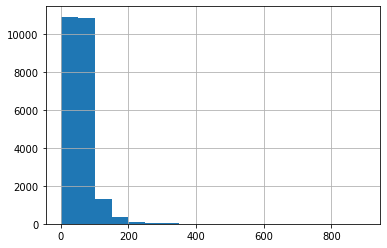

In [86]:
df.total_area.hist(bins=18, range=(0,900));

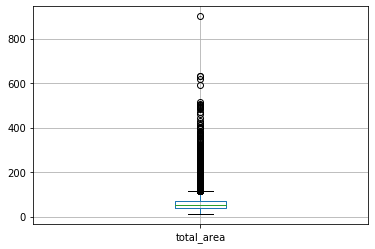

In [87]:
df.boxplot('total_area');

Из гистограммы видно, что основную долю выборки составляют квартиры до 100 кв.м, причем доля квартиры с площадью от 0 до 50 и от 50 до 100 кв.м. примерно одинакова. Одна квартира имеет площадь 900 кв.м, три квартиры - около 600 кв.м, остальные квартиры - меньше 500 кв.м.

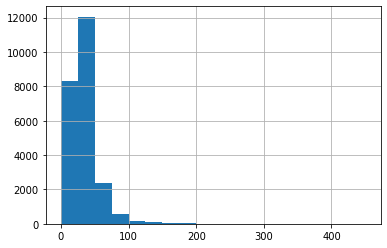

In [88]:
df.living_area.hist(bins=18, range=(0,450));

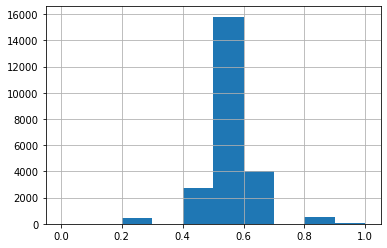

In [89]:
df.living_to_total.hist(range=(0,1));

Наибольшая доля жилой площади находится в интерале от 25 до 50 кв.м - порядка 12000 объектов, далее следует диапазон до 25 кв.м - около 8000 квартир, квартиры с жилой площадью более 50 кв.м. встречаются гораздо реже. Основной объем квартир имеет жилую площадь равную примерно половине от общей площади.

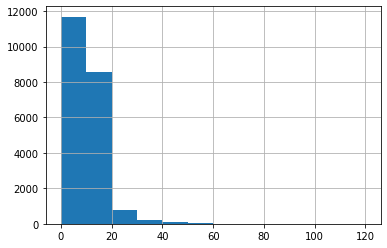

In [90]:
df.kitchen_area.hist(bins=12, range=(0,120));

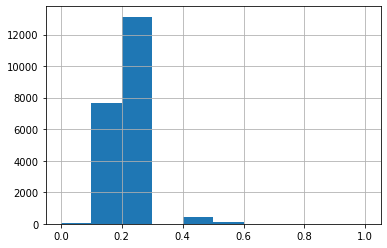

In [91]:
df.kitchen_to_total.hist(range=(0,1));

Наибольшая доля квартир имеют кухни до 20 кв.м. Кухни в основном составляют примерно 20 % жилой площади.

In [92]:
df[['last_price','price_square_metr']].describe()

,last_price,price_square_metr
count,2.364600e+04,2.364600e+04
mean,6.538930e+06,9.941527e+04
std,1.089065e+07,5.028498e+04
min,1.219000e+04,1.118000e+02
25%,3.400000e+06,7.659302e+04
50%,4.650000e+06,9.500000e+04
75%,6.799000e+06,1.142640e+05
max,7.630000e+08,1.907500e+06


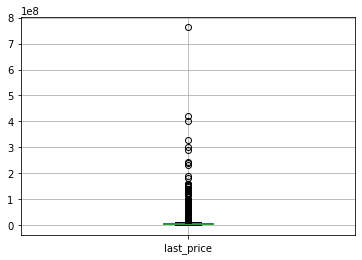

In [93]:
df.boxplot('last_price');

Цены на квартиры доходят до 763 млн.р, причем что цены выше 12 млн.р. уже можно отнести к выбросам (верхняя квартиль + 1,5 IOR). Удалим из выборки наиболее явные выбросы более 200 млн.руб.

In [94]:
df[df['last_price'] > 200000000]['last_price'].count()

9

In [95]:
df = df.drop(df[df['last_price'] > 200000000].index)

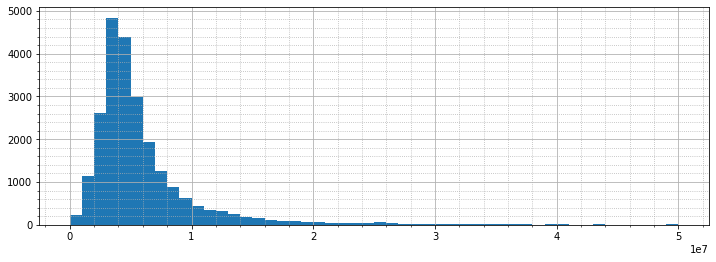

In [96]:
df['last_price'].hist(bins=50, range=(0, 50000000), figsize=(12,4))
plt.minorticks_on()
plt.grid(which='minor',
        linestyle = ':');

Наибольшее количество квартир стоят от 3 до 4 млн - около 4 800 шт и от 4 до 5 млн - 4 400 шт.

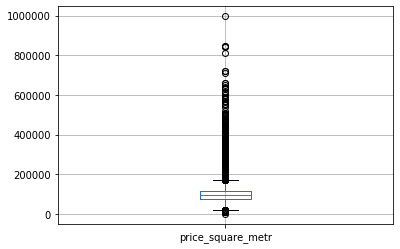

In [97]:
df.boxplot('price_square_metr');

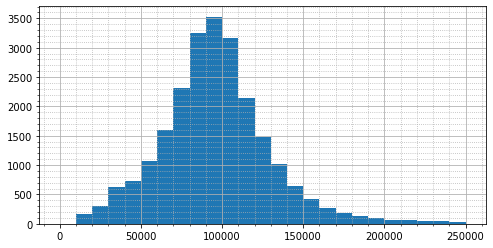

In [98]:
df['price_square_metr'].hist(bins=25, range=(0, 250000), figsize=(8,4))
plt.minorticks_on()
plt.grid(which='minor',
        linestyle = ':');


Цена за квадратный метр достигает почти 2 млн.руб, из них квартиры с ценой более 170 тыс.руб можно отнести к нетипичным. Больше всего квартир с ценой квадратного метра от 90 до 100 тыс.руб - около 3500 объектов, несколько меньше от 80 до 90 и от 100 до 110 тыс.руб. - порядка 3200 шт. в каждой категории.

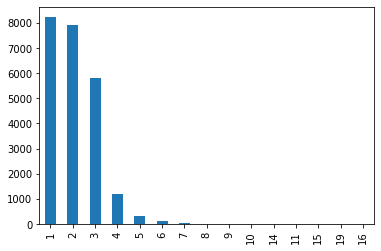

In [99]:
df['rooms'].value_counts().plot(kind='bar');

Большая часть квартир однокомнатные и двукхкомнатные - примерно по 8000 шт, трехкомнатных квартир - около 6000 шт, четыре и более комнаты встречаются существенно реже

In [100]:
df['ceiling_height'].describe()

count    14476.000000
mean         2.727569
std          0.292075
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

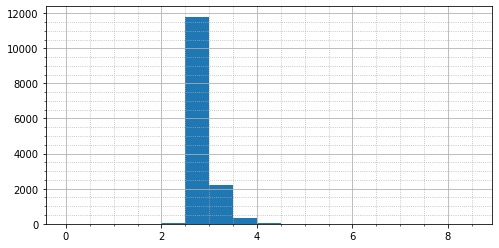

In [101]:
df['ceiling_height'].hist(bins=17, range=(0, 8.5), figsize=(8,4))
plt.minorticks_on()
plt.grid(which='minor',
        linestyle = ':');


Высота потолков составляет в основном от 2,5 до 3 м - около 12000 квартир, реже встречаются квартиры с потолками от 3 до 3,5 м - примерно 2200 объектов недвижимости, более высокие потолки встречаются гораздо реже. Максимальная высота потолка - 8,3 м, при этом значения выше 10 м и менее 1,8 м были преобразованы из выборки на этапе предобработки

Изучим время продажи квартиры.

In [102]:
df['days_exposition'].describe()

count    20458.000000
mean       180.760143
std        219.827416
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

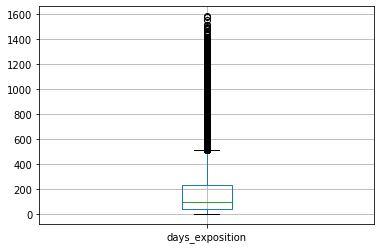

In [103]:
df.boxplot('days_exposition');

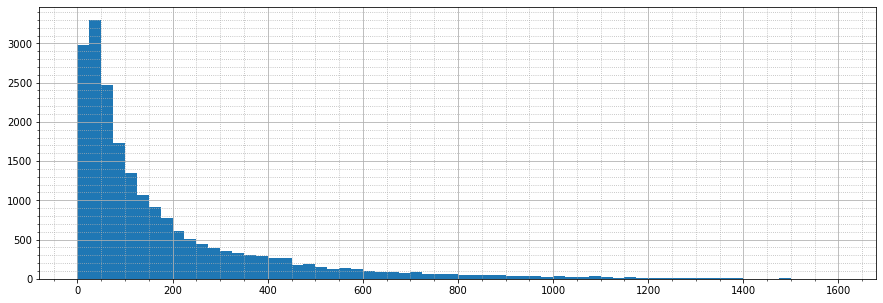

In [104]:
df['days_exposition'].hist(bins=64, range=(0,1600), figsize=(15,5))
plt.minorticks_on()
plt.grid(which='minor',
        linestyle = ':');

Средняя длительность продажи квартиры составляет 181 день, при этом медианное значение почти в два раза меньше - 95 дней, что свидетельствует о наличии сильных выбросов в большую сторону. К ним согласно построенномму "боксплоту" можно отнести значения, превышающие 510 дней. Гистограмма распределения длительности продаж показывает, что чаще всего квартиры продаются в течение 25 - 50 дней - 3300 квартир проданы в течение этого периода, чуть реже (3000 кв.) проданы быстрее 25 дней. При этом распределение имеет очень длинный "хвост". Максимальная продолжительность продажи составила 1580 дней, т.е. больше 4-х лет

Изучим зависимость цена от площади, числа комнат, удалённости от центра, этажности и даты размещения.

Коэффициент корреляции между total_area и last_price: 0.74
Коэффициент корреляции между city_сenters_nearest и last_price: -0.27


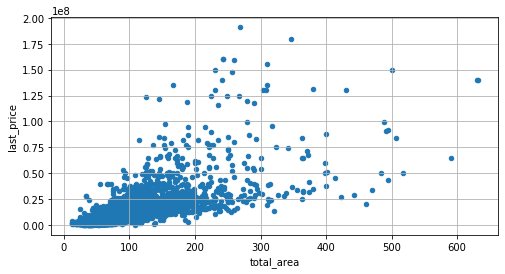

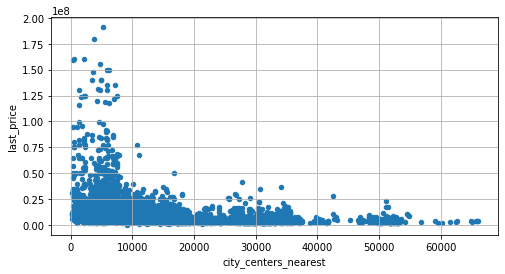

In [105]:
for i in ['total_area', 'city_сenters_nearest']:
    print(f"Коэффициент корреляции между {i} и last_price: {df[i].corr(df['last_price']).round(2)}")
    df.plot(x=i, y='last_price', kind='scatter', figsize=(8, 4), grid=True);

Между ценой и общей площадью наблюдается достаточно сильная положительная корреляция, между ценой и расстоянием от центра - слабая отрицательная корреляция, чем дальше от центра, тем цена недвижимости ниже.

Для определения взаимосвязи цены с категориальными и порядковыми признаками рассчитаем и сравним среднее значение и медиану цены в разбивке по категориям.

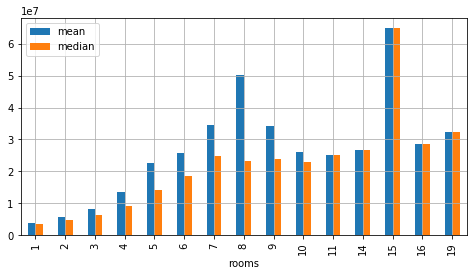

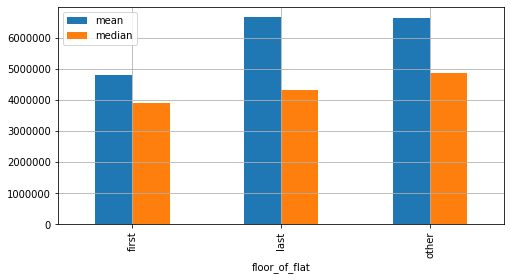

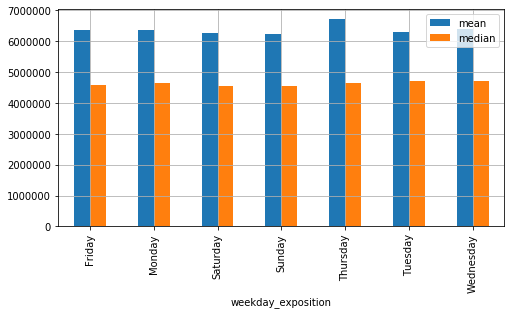

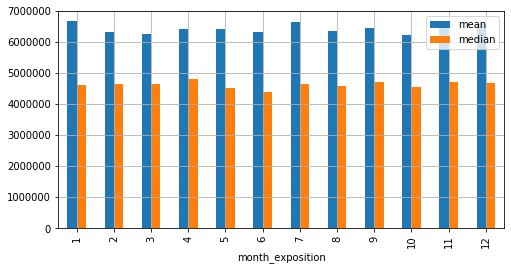

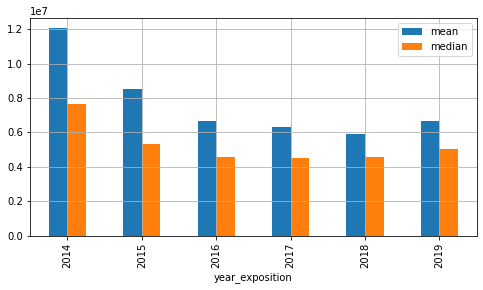

In [106]:
for i in ['rooms', 'floor_of_flat','weekday_exposition', 'month_exposition', 'year_exposition']:
    df.groupby(i)['last_price'].agg(['mean', 'median']).plot(kind='bar', grid=True, figsize=(8,4));

С увеличением количества комнат от одного до восьми цена растет, при дальнейшем увеличении количества комнат роста не наблюдается.
Цены на первом этаже несколько ниже остальных цен. Видимого влияния дня недели, а также месяца продажи на цену квартиры нет. В 2014 году квартиры стоили заметно дороже, в 2015 году стоимость недвижимости сильно упала, в 2016 год также было небольшое снижение по сравнению с 2015 годом, далее цены стабилизировались примерно на одном уровне 

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [107]:
(df.groupby('locality_name')['last_price'].agg(['count', 'mean', 'median'])
    .nlargest(columns='count', n=10)).sort_values(by = 'mean', ascending=False)

,count,mean,median
locality_name,,,
Санкт-Петербург,15709,7.858957e+06,5500000.0
Пушкин,369,6.469036e+06,5180000.0
поселок Парголово,327,4.488075e+06,4100000.0
деревня Кудрово,472,4.358688e+06,3890000.0
поселок Шушары,440,4.108082e+06,3950000.0
Колпино,338,3.964021e+06,3600000.0
Всеволожск,398,3.789068e+06,3450000.0
поселок Мурино,589,3.680752e+06,3400000.0
Гатчина,307,3.488337e+06,3100000.0


Как по количеству объявлений, так и по средней цене квартир лидирует Санкт-Петербург. В остальных населенных пунктах из топ-10 количество объявлений ниже на несколько порядков. Цены в Пушкине ниже, чем в Петербурге примерно на 20%, а в Выборге, который замыкает список населенных пунктов с наибольшим количеством объявлений, цены ниже более чем в два раза.

Выясним, какая область входит в центр Санкт-Петербурга. Для этого создадим столбец с расстоянием до центра, посчитаем среднюю цену для каждого километра и построим график.

In [108]:
df['city_сenters_nearest_km'] = (df['city_сenters_nearest'] / 1000).round()

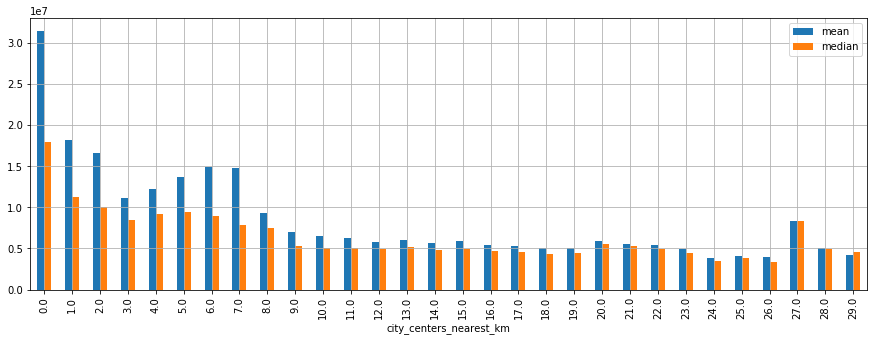

In [109]:
(df[df['locality_name'] == 'Санкт-Петербург'].groupby('city_сenters_nearest_km')['last_price']
                                            .agg(['mean', 'median']).plot(kind='bar', grid=True, figsize=(15,5)));

Центральная зона исходя из динамики средней и медианной цен находится на расстоянии 8-9 км. Также примечательно, что на расстоянии от 3 до 6 км от центра наблюдается некоторый рост средних цен. Чем дальше от центра, тем меньше отличается среднее значение от медианы, т.е. тем меньше выбросов, которые искажают среднюю цену.

Сравним некоторые параметры квартир, расположенных в центральной зоны и всех квартир по городу.

In [110]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург']
df_spb_stat = df_spb[['last_price', 'total_area', 'price_square_metr', 'rooms', 'ceiling_height']].describe()
df_spb_stat

,last_price,total_area,price_square_metr,rooms,ceiling_height
count,1.570900e+04,15709.000000,15709.000000,15709.000000,10091.000000
mean,7.858957e+06,64.538414,114316.671991,2.176459,2.764693
std,9.225006e+06,39.132862,46193.215261,1.132738,0.310484
min,1.219000e+04,12.000000,111.800000,1.000000,2.000000
25%,4.200000e+06,42.000000,90909.100000,1.000000,2.550000
50%,5.500000e+06,55.000000,104761.900000,2.000000,2.700000
75%,8.150000e+06,74.500000,124390.200000,3.000000,2.850000
max,1.908700e+08,631.200000,995983.900000,19.000000,8.300000


In [111]:
df_centre = df[(df['locality_name'] == 'Санкт-Петербург') & (df['city_сenters_nearest_km'] <= 8)]
df_centre_stat = df_centre[['last_price', 'total_area', 'price_square_metr', 'rooms', 'ceiling_height']].describe()
df_centre_stat

,last_price,total_area,price_square_metr,rooms,ceiling_height
count,4.111000e+03,4111.000000,4111.000000,4111.000000,2678.000000
mean,1.341805e+07,89.575113,140433.536536,2.756507,3.057879
std,1.562317e+07,55.867763,74080.972199,1.405348,0.377220
min,1.600000e+06,12.000000,15345.300000,1.000000,2.000000
25%,6.450000e+06,55.000000,100000.000000,2.000000,2.800000
50%,8.950000e+06,76.000000,123498.000000,3.000000,3.000000
75%,1.380000e+07,106.700000,153348.050000,3.000000,3.230000
max,1.908700e+08,631.200000,995983.900000,19.000000,6.000000


In [112]:
df_centre_stat / df_spb_stat

,last_price,total_area,price_square_metr,rooms,ceiling_height
count,0.261697,0.261697,0.261697,0.261697,0.265385
mean,1.707358,1.387935,1.228461,1.266510,1.106046
std,1.693567,1.427643,1.603720,1.240665,1.214941
min,131.255127,1.000000,137.256708,1.000000,1.000000
25%,1.535714,1.309524,1.100000,2.000000,1.098039
50%,1.627273,1.381818,1.178845,1.500000,1.111111
75%,1.693252,1.432215,1.232798,1.000000,1.133333
max,1.000000,1.000000,1.000000,1.000000,0.722892


В центральную зону вошло 4 111 квартир, во всем городе 15 709 квартир, т.е. в центральной зоне находится примерно четверть всех квартир. Средняя стоимость квартир в центре выше в 1,7 раза, общая площадь квартир больше в среднем в 1,4 раза, а стоимость квадратного метра жилья в 1,2 раза. В центральной зоне в основном представлены трехкомнатные квартиры, тогда как по всему городу - это чаще всего двухкомнатные. Высота квартир в центре (3 м) также несколько выше остальных квартир, представленных по городу (2,7 м). Как правило такая высота потолков более характерна для старинных домов, тогда как для "хрущевок" и "новостроек" высота потолков, как правило, ниже 3 м.

Коэффициент корреляции между total_area и last_price по Санкт-Петербургу: 0.75
Коэффициент корреляции между total_area и last_price по центральной зоне: 0.71
Коэффициент корреляции между city_сenters_nearest и last_price по Санкт-Петербургу: -0.33
Коэффициент корреляции между city_сenters_nearest и last_price по центральной зоне: -0.1


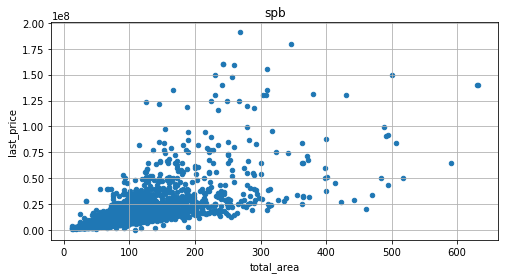

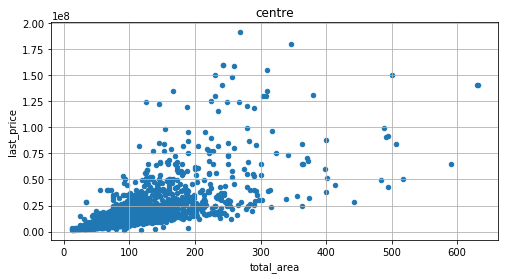

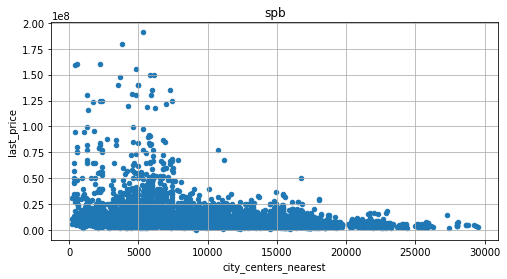

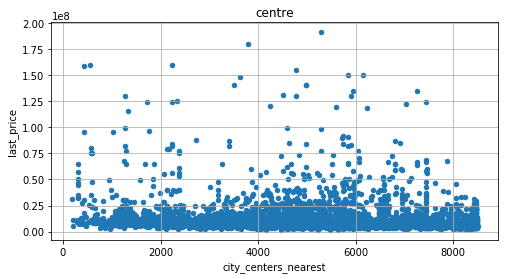

In [113]:
for i in ['total_area', 'city_сenters_nearest']:
    print(f"Коэффициент корреляции между {i} и last_price по Санкт-Петербургу: {df_spb[i].corr(df_spb['last_price']).round(2)}")
    print(f"Коэффициент корреляции между {i} и last_price по центральной зоне: {df_centre[i].corr(df_centre['last_price']).round(2)}")

    df_spb.plot(x=i, y='last_price', kind='scatter', figsize=(8, 4), grid=True, title='spb')
    df_centre.plot(x=i, y='last_price', kind='scatter', figsize=(8, 4), grid=True, title='centre')

Зависимость цены от площади примерно одинаковая, как в целом по городу, так и отдельно по центральной зоне. Внутри центральной зоны, зависимость от удаленности от центра слабже, чем по городу в целом

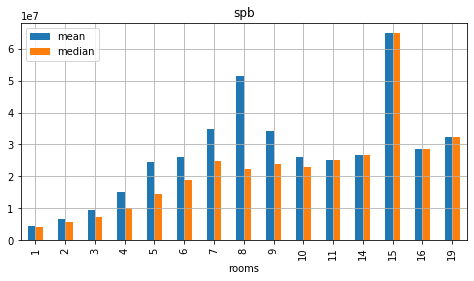

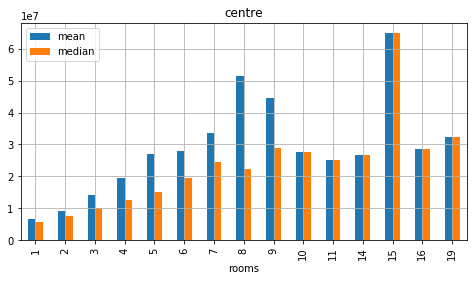

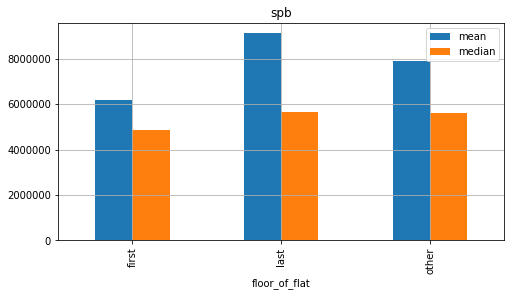

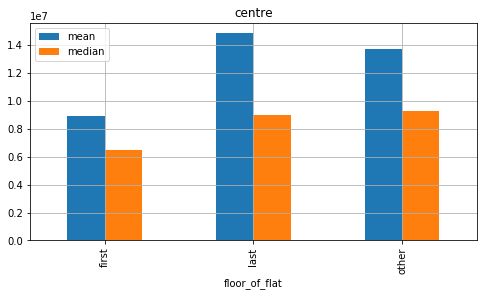

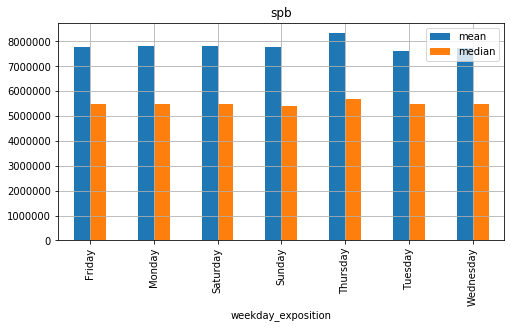

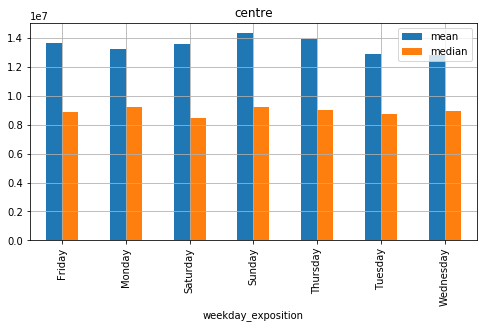

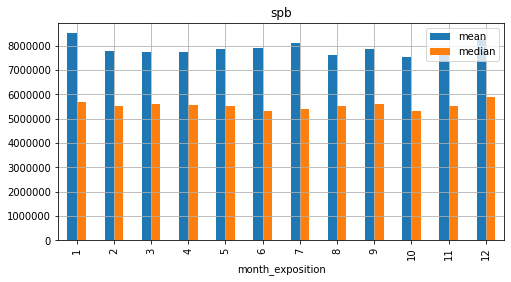

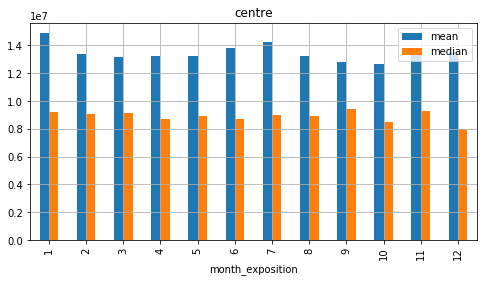

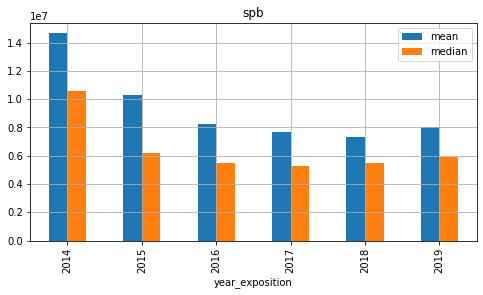

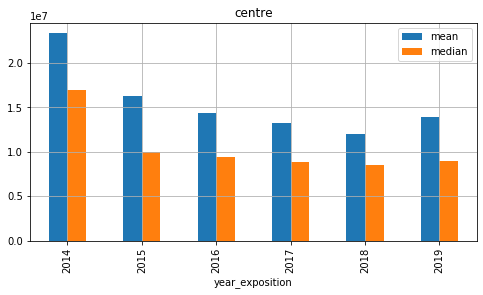

In [114]:
for i in ['rooms', 'floor_of_flat','weekday_exposition', 'month_exposition', 'year_exposition']:
    df_spb.groupby(i)['last_price'].agg(['mean', 'median']).plot(kind='bar', grid=True, figsize=(8,4), title='spb')
    df_centre.groupby(i)['last_price'].agg(['mean', 'median']).plot(kind='bar', grid=True, figsize=(8,4), title='centre')

Зависимость цены квартир по центральной зоне от таких параметров, как количество комнат, этажность, дата публикации схожи с зависимостями по городу в целом и повторяют динамику по выборке в целом, описанную выше.

### Вывод

Изучены и установлены параметры, наиболее коррелирующие с ценой - площадь квартиры, количества комнат, год продажи, удалённость от центра. Определена центральная зона, в которой цены, характеризуются максимальными значениями. Параметры центральной зоны, изучены в сопоставлении с парметрами по городу в целом.

## Общий вывод

На этапе предобработки были проанализированы и по-возможности устранены пропуски, дубли и нетипичные значения по ряду параметров, содержащихся в исходном датафрейме: `living_area` , `ceiling_height`,  `balcony`,  `days_exposition` , `locality_name`, `first_day_exposition`. Посчитаны и добавлены новые признаки, позволяющие более детально изучить выборку и зависимости между параметрами: цена квадратного метра; день недели, месяц и год публикации объявления;  этаж квартиры: первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей. На последнем этапе произведен разведывательный анализ данных, выявлены статистические характеристики ряда признаков, изучены и определены факторы, находящиеся в наибольшей взимосвязи с ценой продажи.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод